In [36]:
# import the libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjusts the cofiguration of plots we will use


# Read in the data

df = pd.read_csv(r'C:\Users\HP\Desktop\python_portfolio_movie.csv')

In [2]:
# lets lookut the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# lets see if there is any missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# lets look at data tyes

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [37]:
# in order to change data types we have to replce na value with 0
df.fillna(0, inplace=True)

# replacing infinte number to nearest max numer
df.replace([np.inf, -np.inf], np.iinfo(np.int64).max, inplace=True)


In [38]:
# now lets change the data type 

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')


In [30]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [39]:
## let make sure the year column has same year as relesed column

df['year']= df['released'].str.extract(r'(\d{4})')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [40]:
# lets order data by gross

df = df.sort_values(by = ['gross'], inplace = False, ascending= False)

In [10]:
## let s just set it to max rows

pd.set_option('display.max_rows', None)

In [32]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


<function matplotlib.pyplot.show(close=None, block=None)>

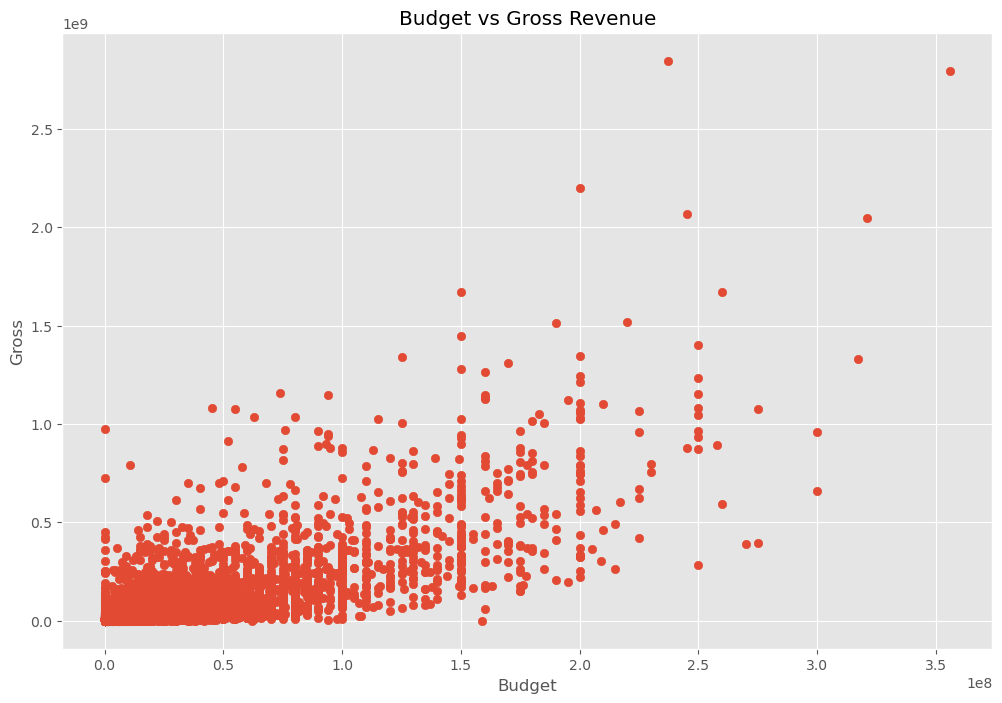

In [12]:
##lets correlate budget with gross revenue 

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

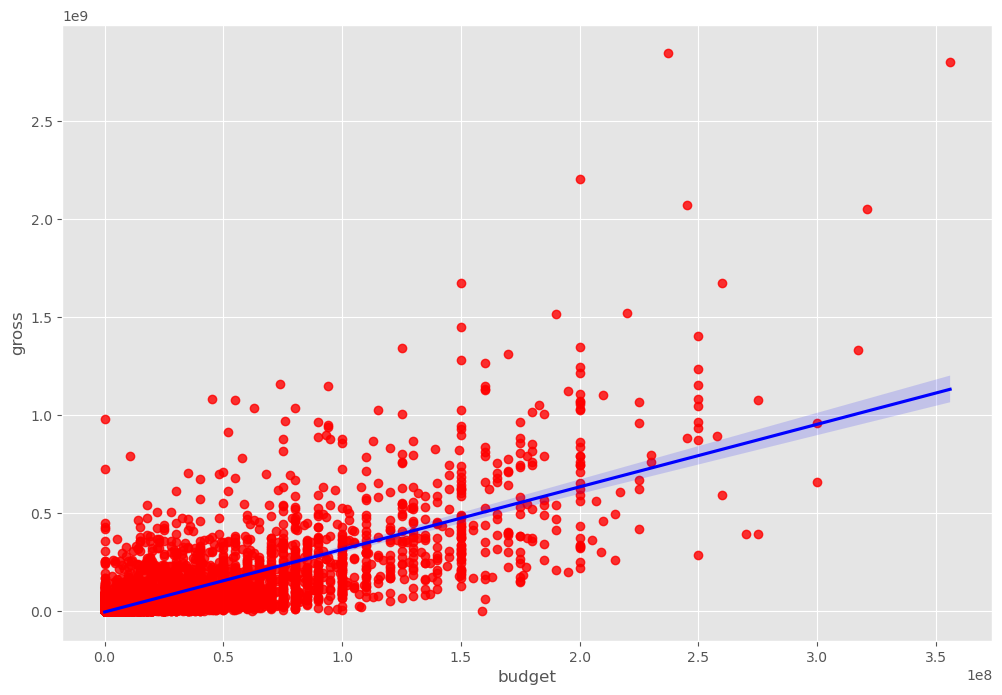

In [13]:
# lets use regresion line to correlate

sns.regplot(x='budget',y='gross' , data= df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [14]:
# let's do the correlation

df.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.394564,0.306984,0.268372,0.244339,1.000000


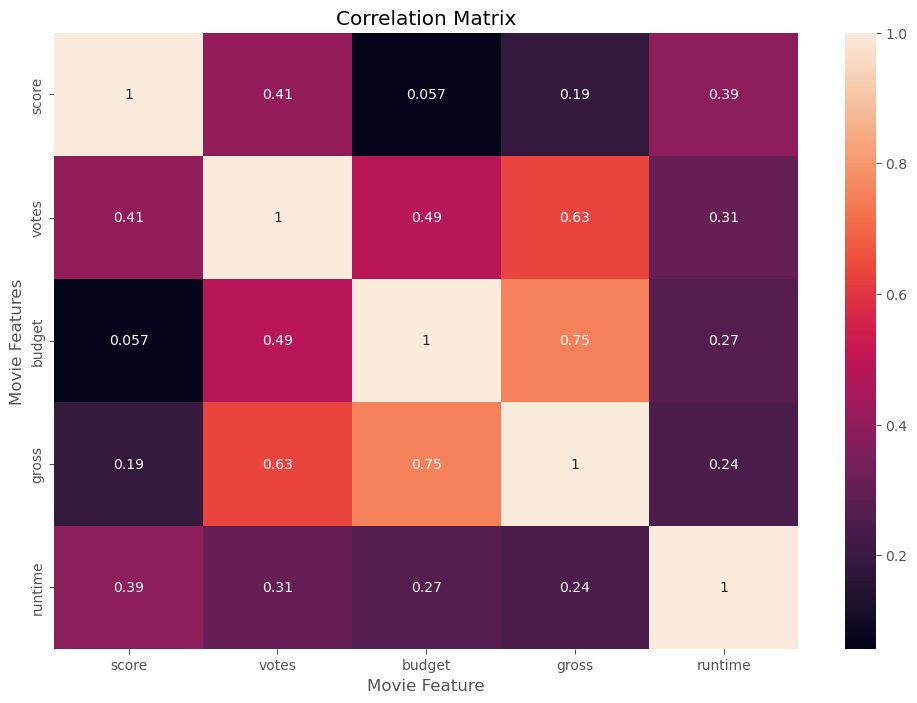

In [16]:
## Let's use the heat map 

correlation_matrix = df.corr(method= 'pearson')

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Features') 
plt.show()

In [33]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype== 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,6,0,29,697,7.8,1100000,1155,1779,2335,56,237000000,2847246203,2254,162.0
7445,535,6,0,39,184,8.4,903000,162,744,2242,56,356000000,2797501328,1607,181.0
3045,6896,6,6,17,705,7.8,1100000,1155,1779,1596,56,200000000,2201647264,2254,194.0
6663,5144,6,0,35,699,7.8,876000,1125,2551,525,56,245000000,2069521700,1541,138.0
7244,536,6,0,38,193,8.4,897000,162,744,2242,56,321000000,2048359754,1607,149.0


In [41]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


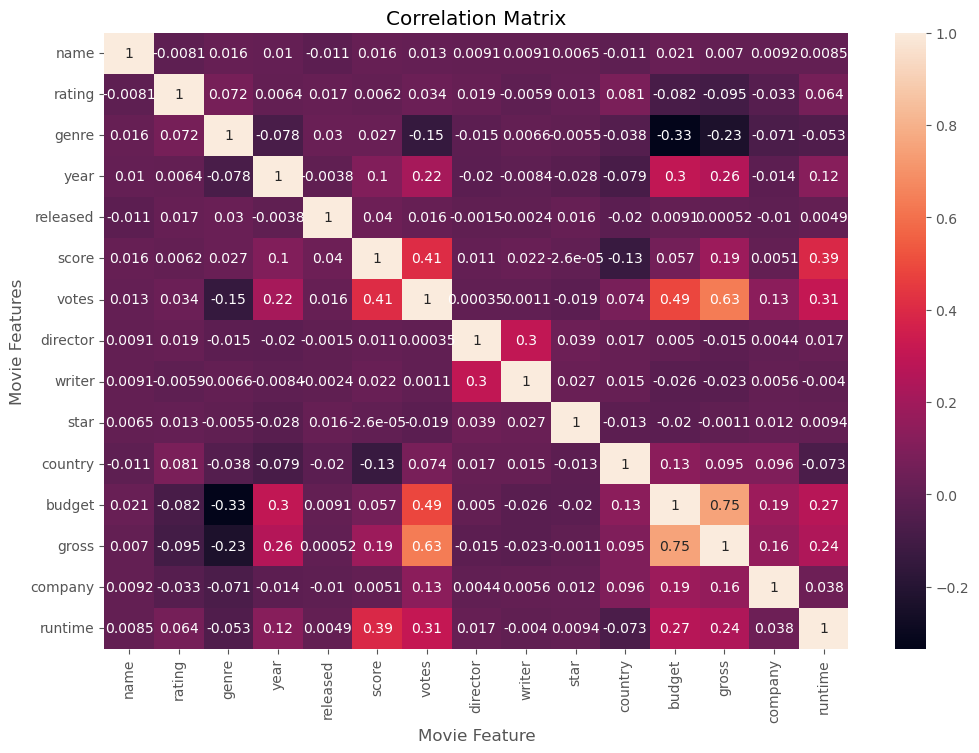

In [29]:
correlation_matrix = df_numerized.corr(method= 'pearson')

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Features') 
plt.show()

In [42]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.010225,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483
rating,-0.008069,1.000000,0.072423,0.006403,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133
genre,0.016355,0.072423,1.000000,-0.078210,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914
year,0.010225,0.006403,-0.078210,1.000000,-0.003775,0.100897,0.217782,-0.020385,-0.008391,-0.027606,-0.079009,0.300236,0.255130,-0.014144,0.120344
released,-0.011311,0.016613,0.029822,-0.003775,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852
score,0.016377,0.006192,0.027384,0.100897,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005081,0.394564
votes,0.013038,0.033743,-0.145296,0.217782,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984
director,0.009079,0.019483,-0.015258,-0.020385,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062
writer,0.009081,-0.005921,0.006567,-0.008391,-0.002404,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036
star,0.006472,0.013405,-0.005477,-0.027606,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418


In [43]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.010225
      released   -0.011311
dtype: float64

In [46]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

genre   budget   -0.334021
budget  genre    -0.334021
genre   gross    -0.234297
gross   genre    -0.234297
votes   genre    -0.145296
dtype: float64

In [47]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]

high_corr.head()

votes   gross     0.632870
gross   votes     0.632870
        budget    0.750157
budget  gross     0.750157
name    name      1.000000
dtype: float64

#### Budget and Votes have highest correlation to Gross Earnings
#### Company has low correlation